In [2]:
collection = "tweets_hayotrocamino"

In [1]:
import pandas as pd

%matplotlib inline

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 999)
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Modifique el path de acceso.
tweets = pd.read_csv(r'C:\Users\causa\Desktop\Data Science\Data Science Projects\Sentiment Analysis-Celayes\tweets_hayotrocamino_tweets.csv')
tweets_sentiment = pd.read_csv(r'C:\Users\causa\Desktop\Data Science\Data Science Projects\Tweeter-\tweets_hayotrocamino_tweets.csv',usecols = ['sentiment'])

In [3]:
tweets = pd.concat([tweets,tweets_sentiment],axis=1)

In [3]:
# Esta es una función que hice para sacar algunos caracteres.
def remove_character(df,column,char):
    for i in range(len(df)):
        if char in df[column][i]:
            df[column][i] = df[column][i].replace(char,'')


In [4]:
tweets['created_at'] = pd.to_datetime(tweets['created_at'],
                                      format="%a %b %d %H:%M:%S +0000 %Y")

# Total de tuits

In [5]:
# Numero de instancias del dataset original.
initial_entries = len(tweets)
initial_entries

223973

# Columnas

In [4]:
pd.DataFrame(tweets.columns)

,0
0,id
1,created_at
2,text
3,favorited
4,retweeted
5,user_name
6,user_id
7,mentions
8,hts
9,original_id


# Algunos ejemplos

In [6]:
tweets.head(5)

,id,created_at,text,favorited,retweeted,user_name,user_id,mentions,hts,original_id,full_text,favorite_count,retweet_count
0,1101341840090021888,2019-03-01 04:42:11,RT @LanusUCiudadana: Este Viernes 1° de Marzo salimos a la calle con mesas de difusión en el marco de la Jornada #CristinaEsPueblo Seguim…,False,False,silvia coceres,2337452678,LanusUCiudadana,CristinaEsPueblo,1101302297324384256,"Este Viernes 1° de Marzo salimos a la calle con mesas de difusión en el marco de la Jornada #CristinaEsPueblo Seguimos organizándonos para recuperar la Nación, la Provincia y nuestro distrito de #Lanús de la mano de @CFKArgentina #HayOtroCamino Sumate! 👇🏼 #LanúsSomosTodxs https://t.co/l0tycUfqHY",23,14
1,1101343224889835522,2019-03-01 04:47:41,RT @UniCiudadanaAR: #HaganAlgo ¿Qué le pedirías al gobierno que haga para frenar la crisis económica? #HayOtroCamino,False,False,alberto parmigiano,1270472840,UniCiudadanaAR,HaganAlgo HayOtroCamino,1100514185216180225,#HaganAlgo ¿Qué le pedirías al gobierno que haga para frenar la crisis económica? #HayOtroCamino,805,340
2,1101343299686854657,2019-03-01 04:47:59,Pero la candidata a diputada por Sta Fé Amalia Granata sostiene que fué CFK la que aumentó el número de pobres 😤😤,False,False,La Fonde,3302398083,NaN,NaN,1101343299686854657,Pero la candidata a diputada por Sta Fé Amalia Granata sostiene que fué CFK la que aumentó el número de pobres 😤😤,0,0
3,1101344190456385536,2019-03-01 04:51:31,"RT @FerIglesias: Clarooo, Fer. Lo que no funcionó con la soja a 600 y las tasas de la FED a 0,25%, con la soja a 340 y las tasas a 2,5% no…",False,False,Lula Nomerompaslasbolas,2259370703,FerIglesias,NaN,1101280243485163520,"Clarooo, Fer. Lo que no funcionó con la soja a 600 y las tasas de la FED a 0,25%, con la soja a 340 y las tasas a 2,5% no puede fallar! https://t.co/VyAVyxF9BA",474,165
4,1101344538503856128,2019-03-01 04:52:54,"Espinoza, durante todo el peronismo fuimos un asco de país. Están en La Matanza hace décadas y es el peor municipio… https://t.co/PLor5R7Wzr",False,False,Mateo J.,175564792,NaN,NaN,1101344538503856128,"Espinoza, durante todo el peronismo fuimos un asco de país. Están en La Matanza hace décadas y es el peor municipio de la provincia. Las provincias del norte, gobernadas por peronistas, son las peores del país. Sus propuestas lo único que garantizan es decadencia. Ladrones.",0,0


# Volumen de tuits por hora

In [17]:
# TODO: mostrar más ticks de hora en el eje x

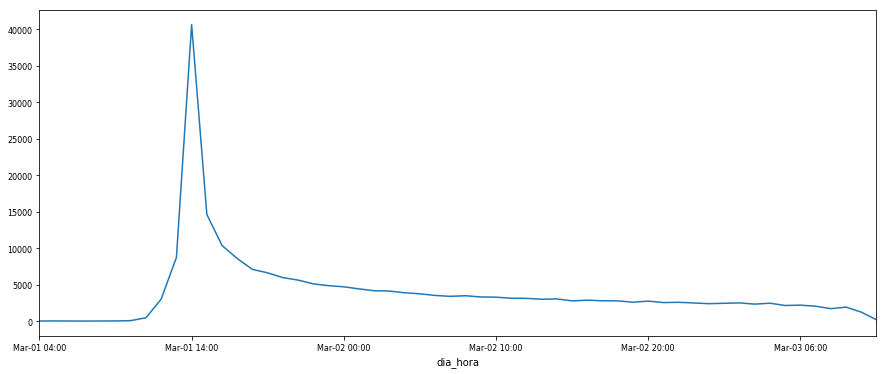

In [6]:
tweets["dia_hora"] = tweets.created_at.dt.strftime("%h-%d %H:00") #la columna "dia_hora" deberia alojar un string, objeto. 
gb = tweets.groupby(tweets.dia_hora)["dia_hora"].count() 
# Cada tweet tiene asociado un "dia_hora", asi que cuanto contamos cuantos valores unicos de "dia_hora"
# Obtenemos el nro de tweets por hora, aquí Pablo Celayes lo llama  "Volumen de tuits por hora"
# Se puede entender como la densidad de tuits por hora, cuantos tweets por hora hay. 
gb.plot(figsize=(15,6), fontsize=8)

# Tuits más retuiteados

In [7]:
idx = tweets.groupby(['original_id'])['retweet_count'].transform(max) == tweets['retweet_count'] #Este objecto es una serie booleana.
tweets[idx][['original_id', 'full_text', 'favorite_count', 'retweet_count']].sort_values(by='retweet_count', ascending=False).head(10)

,original_id,full_text,favorite_count,retweet_count
104991,1098049251836391424,charlotte caniggia que se limpia el orto con dólares se dio cuenta y vos que pagas la luz en cuotas no https://t.co/WykH3ezo9g,58684,20224
189501,1039476200811446274,Hilo de frases de Macri que se pueden usar para cortar una relación:,40493,15900
221815,1100728869445922816,"¿Cómo es posible que los socios de Sánchez, los de Podemos, vengan al Congreso con camisetas de “Yo con Maduro”? ¿Es que no tienen corazón? ¿No ven cómo está masacrando Maduro al pueblo venezolano? Yo estoy con Venezuela, la democracia y la libertad 🇻🇪👇🏻 https://t.co/bocqWJR3jG",21795,14091
160102,973190348435533824,padres hace 10 años: TENÉ CUIDADO CON QUIEN CHATEÁS NO CREAS TODO LO QUE TE DICE LA INTERNET padres hoy: y viste que en realidad macri y cristina son amantes lo leí ayer jaja,43193,11595
194843,1068648026389004289,"Macri se emocionó. Yo también. Ésta imagen no se borrará más de los ojos de los argentinos de bien. El mundo entero gritando: ""Argentina, Argentina"", en el Teatro Colón. Si se lo perdieron, vean ésto por favor. Gracias Argentina 🇦🇷👇 https://t.co/KUyFKnszOn",31293,10042
191839,598170504831307776,3 de junio. Plaza Congreso. Basta de femicidios. #NiUnaMenos http://t.co/zQSz1ti3C7,4870,9045
153156,1036069043520909314,"#URGENTE Macri echa a Lopetegui y Quintana, hombres de Marcos Peña, y también elimina ministerios: Ciencia y Tecnología, Cultura, Energía, Agroindustria, Salud, Turismo, Ambiente, Trabajo y Modernización. Un desguace del Estado nunca antes visto. Lamentable por donde se lo mire.",11011,8689
190238,1069407274043621376,"Gente, agradecería si me ayudan a compartir esta investigación que hicimos en @eldestapeweb y que debería ser un escándalo nacional. El hermano de Macri recibió USD5.000.000 de la sospechosa empresa que ganó 6 parques eólicos revelado por @Emiliadelfino https://t.co/aEX8QFiFJW",6345,8273
218222,1092942954384236544,si ustedes votaron al pelotudo de macri por qué yo no puedo votar al más pijudo https://t.co/eudzh1PmP4,26059,7874
171931,1035280236320120837,"No fue solo Macri. Hay otros responsables del hambre del pueblo: Lanata, Leuco, Majul, Del Moro y tantos que llenaron al pueblo de odio, hablando solo de Cristina y escondiendo el saqueo. Los hicieron votar a su victimario. Ahora quieren abrirse. son despreciables",12990,7544


# Tuits más faveados

In [8]:
# TODO: evitar duplicados (por ej: el 9 y el 10)
# Aplicar misma solución a más retuiteados
tweets.loc[tweets.text.duplicated(keep="first"),:];

In [9]:
tweets.drop_duplicates(subset=['text'],keep="first",inplace=True)

In [10]:
final_entries=len(tweets)
final_entries

71443

In [11]:
removed_entries=abs(final_entries-initial_entries)
print("From the original DataFrame were removed: {}".format(removed_entries))

From the original DataFrame were removed: 152530


In [12]:
idx = tweets.groupby(['original_id'])['favorite_count'].transform(max) == tweets['favorite_count']
tweets[idx][['original_id', 'full_text', 'favorite_count', 'retweet_count']].sort_values(by='favorite_count', ascending=False).head(10)

,original_id,full_text,favorite_count,retweet_count
104991,1098049251836391424,charlotte caniggia que se limpia el orto con dólares se dio cuenta y vos que pagas la luz en cuotas no https://t.co/WykH3ezo9g,58684,20224
160102,973190348435533824,padres hace 10 años: TENÉ CUIDADO CON QUIEN CHATEÁS NO CREAS TODO LO QUE TE DICE LA INTERNET padres hoy: y viste que en realidad macri y cristina son amantes lo leí ayer jaja,43193,11595
189501,1039476200811446274,Hilo de frases de Macri que se pueden usar para cortar una relación:,40493,15900
194843,1068648026389004289,"Macri se emocionó. Yo también. Ésta imagen no se borrará más de los ojos de los argentinos de bien. El mundo entero gritando: ""Argentina, Argentina"", en el Teatro Colón. Si se lo perdieron, vean ésto por favor. Gracias Argentina 🇦🇷👇 https://t.co/KUyFKnszOn",31293,10042
218222,1092942954384236544,si ustedes votaron al pelotudo de macri por qué yo no puedo votar al más pijudo https://t.co/eudzh1PmP4,26059,7874
2034,1100728869445922816,"¿Cómo es posible que los socios de Sánchez, los de Podemos, vengan al Congreso con camisetas de “Yo con Maduro”? ¿Es que no tienen corazón? ¿No ven cómo está masacrando Maduro al pueblo venezolano? Yo estoy con Venezuela, la democracia y la libertad 🇻🇪👇🏻 https://t.co/bocqWJR3jG",21362,13861
110072,1085195644367589376,"Ayer en Jujuy, un paso más en la brutal persecución que sufre Milagro Sala, con una condena a medida de Macri y Gerardo Morales. #ArgentinaSinEstadoDeDerecho https://t.co/BgnQVu16po",14065,6955
1596,1100697116308135937,Albert Rivera en este momento diciendo en el Congreso que ha sido un error subir el salario mínimo a 900€. Cómo se nota a qué clase social representa Ciudadanos. Mucha banderita y odio pero luego es lo de siempre: políticas contra las familias trabajadoras.,13181,7129
107592,1035280236320120837,"No fue solo Macri. Hay otros responsables del hambre del pueblo: Lanata, Leuco, Majul, Del Moro y tantos que llenaron al pueblo de odio, hablando solo de Cristina y escondiendo el saqueo. Los hicieron votar a su victimario. Ahora quieren abrirse. son despreciables",12977,7535
202053,1097999667546284032,"Gracias a Urtubey, Cristina Kirchner, Sergio Massa y a todo el Peronismo por recordarnos lo que son. Hoy se unieron para voltear el DNU de #ExtinciónDeDominio. Esto no es en contra de Macri, lo hacen en contra de la gente. Lo que se robaron durante décadas es lo que nos falta.",12522,7200


# Nube de palabras

In [13]:
# Esta funcion opera sobre un string. Si queremos usarla en una serie, por ejemplo tweets['text'],
# tenemos que llamar un .apply(clean) porque la va a correr sobre cada string de la columna text. 
import gensim
import re

def clean(s):
    s = gensim.utils.deaccent(s)
    s = s.strip().lower()
    s = s.replace("rt ", " ")

    # remove mentions
    s = re.sub(r"@\w+", " ", s)

    # remove URLs
    s = re.sub(r"https?://t\.co/\w+", " ", s)
    s = re.sub(
        r"https?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+",
        " ", s)
    s = re.sub(r",", " ", s)
    s = re.sub(r"[^A-Za-z0-9ñ()\'\`#]", " ", s)
    s = re.sub(r"\(", " \( ", s)
    s = re.sub(r"\)", " \) ", s)
    s = re.sub(r"\?", " \? ", s)
    s = re.sub(r"\s{2,}", " ", s)

    return s

In [14]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

def tokenize(s):
    return [t for t in s.strip().split() if (t not in stopwords.words('spanish')
                                             and len(t) > 1
                                             and t[0] != '#'
                                             and t != "si")]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\causa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
# En esta funcion llama a la funcion clean, notar que solo usa el nombre de la funcion
# Y además, llama a la funcion tokenize.
def get_all_tokens(tweets):
    all_tokens = []
    for tuit in tweets.text.apply(clean).unique(): # aqui limpia cada una de las filas 
        all_tokens += tokenize(tuit) + ['.']
    return all_tokens

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [17]:
all_tokens = get_all_tokens(tweets.sample(5000))

(-0.5, 799.5, 399.5, -0.5)

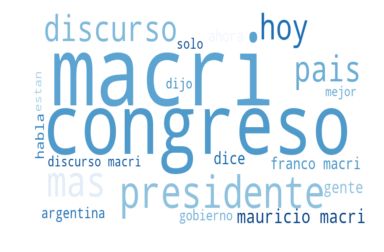

In [18]:
wordcloud = WordCloud(normalize_plurals=False, colormap='Blues', max_words=20, width=800, height=400,
                      min_font_size=12, background_color='white').generate(' '.join(all_tokens))

plt.imshow(wordcloud, interpolation='bilinear', aspect='auto')
plt.axis("off")

# Top hashtags por volumen de tuits

In [19]:
from collections import Counter

In [60]:
ht_counts = Counter()

In [21]:
for hts in tweets[~tweets.hts.isna()].hts.values:
    for ht in hts.split():
        ht_counts[ht] += 1

In [22]:
top10_hts = ht_counts.most_common(10)

<BarContainer object of 10 artists>

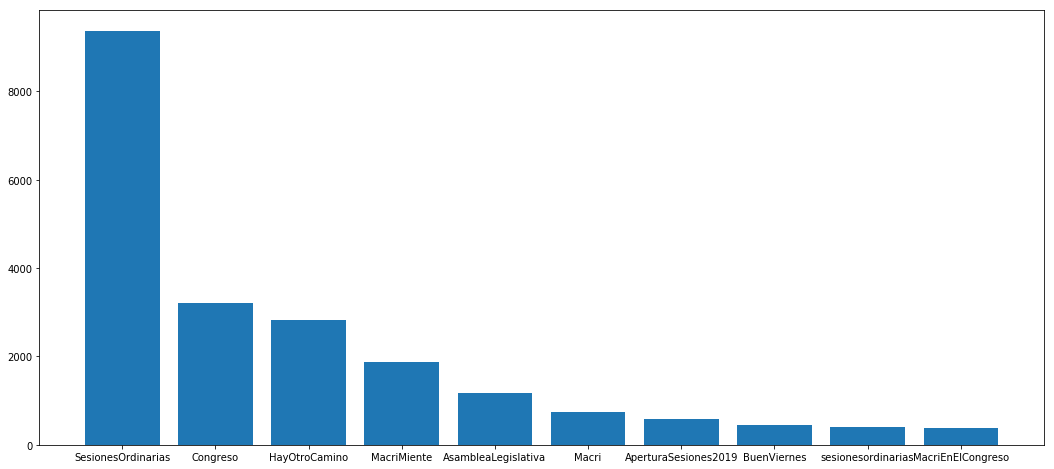

In [23]:
fig, ax = plt.subplots(figsize=(18,8))
plt.bar(*zip(*top10_hts))

In [24]:
# TODO: arreglar tamaño de figura para que se lean los hashtags

In [25]:
top10_hts

[('SesionesOrdinarias', 9378),
 ('Congreso', 3213),
 ('HayOtroCamino', 2825),
 ('MacriMiente', 1866),
 ('AsambleaLegislativa', 1175),
 ('Macri', 740),
 ('AperturaSesiones2019', 575),
 ('BuenViernes', 451),
 ('sesionesordinarias', 402),
 ('MacriEnElCongreso', 391)]

# Volumen hashtag por hora

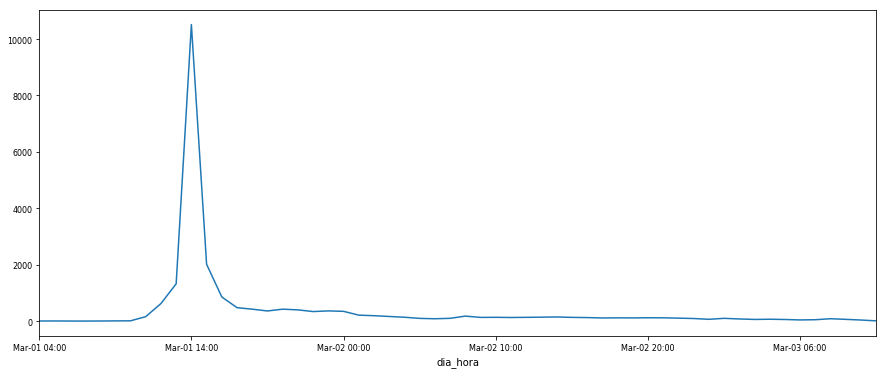

In [26]:
hts_hora = tweets.groupby(tweets.dia_hora)["hts"].count()
hts_hora.plot(figsize=(15,6), fontsize=8)

In [27]:
tweets['cleansed_text'] = tweets['text'].apply(clean)

In [28]:
tweets.sample(5)

,id,created_at,text,favorited,retweeted,user_name,user_id,mentions,hts,original_id,full_text,favorite_count,retweet_count,sentiment,dia_hora,cleansed_text
44416,1101492494494244864,2019-03-01 14:40:50,No se siente estafado el globerto al escuchar todas las mentiras de Macri? #Congreso,False,False,Mariano E. Azcurra ℹ,4924373523,NaN,Congreso,1101492494494244864,No se siente estafado el globerto al escuchar todas las mentiras de Macri? #Congreso,0,0,N,Mar-01 14:00,no se siente estafado el globerto al escuchar todas las mentiras de macri #congreso
195261,1101964879836168192,2019-03-02 21:57:55,"RT @Yobancoacris: Que se sepa ! La presentación de @ignaciocopani para el 8 en Olivos se canceló, la municipalidad de Vicente López a cargo…",False,False,juancuyo,51786212,Yobancoacris ignaciocopani,NaN,1101939760694743040,"Que se sepa ! La presentación de @ignaciocopani para el 8 en Olivos se canceló, la municipalidad de Vicente López a cargo de Jorge Macri la prohibió #Dictaduramacrista tendría miedo de que se escuche desde la quinta?? https://t.co/rTiVBnvFEi",1,2,N,Mar-02 21:00,que se sepa la presentacion de para el 8 en olivos se cancelo la municipalidad de vicente lopez a cargo
67114,1101511750103502849,2019-03-01 15:57:20,"RT @jetrios1: Ahí tienen, la oposición en su conjunto queda expuesta como lo q es, un gran grupo de resentidos perdedores q ven desesperado…",False,False,GraceMazzola #🅽🆂🅱🌱🌱🌱🚌,153977017,jetrios1,NaN,1101511371433357312,"Ahí tienen, la oposición en su conjunto queda expuesta como lo q es, un gran grupo de resentidos perdedores q ven desesperados como se van quedando afuera de los curros y adentro de los penales #SesionesOrdinarias, mostró el #miedo q tienen #NVM, ya lo huelen 🥂 https://t.co/XOsXOOYzbn",0,1,N,Mar-01 15:00,ahi tienen la oposicion en su conjunto queda expuesta como lo q es un gran grupo de resentidos perdedores q ven desesperado
56206,1101499718717329409,2019-03-01 15:09:32,#Encuesta #Poll #Actualidad #Politica #Argentina #MacriEnElCongreso #1M #AsambleaLegislativa ¿Qué te pareció el d… https://t.co/CZ16FrQwrn,False,False,So Many Polls! 📊 🖊️,994790819273076736,NaN,Encuesta Poll Actualidad Politica Argentina MacriEnElCongreso 1M AsambleaLegislativa,1101499718717329409,#Encuesta #Poll #Actualidad #Politica #Argentina #MacriEnElCongreso #1M #AsambleaLegislativa ¿Qué te pareció el discurso de apertura de @mauriciomacri de las #SesionesOrdinarias del #Congreso?,0,0,P,Mar-01 15:00,#encuesta #poll #actualidad #politica #argentina #macrienelcongreso #1m #asamblealegislativa que te parecio el d
52165,1101495813937737731,2019-03-01 14:54:01,RT @lmoraalfonsin: Habla de suba de 15% de exportaciones con una crisis cambiaria que corrigió 100% el TCN en el medio #SesionesOrdinarias,False,False,Jorge,4705206511,lmoraalfonsin,SesionesOrdinarias,1101494836543307776,Habla de suba de 15% de exportaciones con una crisis cambiaria que corrigió 100% el TCN en el medio #SesionesOrdinarias,1,1,N,Mar-01 14:00,habla de suba de 15 de exportaciones con una crisis cambiaria que corrigio 100 el tcn en el medio #sesionesordinarias


In [29]:
from textblob import TextBlob

In [30]:
def sentiment_analysis(tweet):
    analysis=TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'P'
    elif analysis.sentiment.polarity == 0:
        return 'NEU'
    else:
        return 'N'

In [31]:
tweets['sentiment_blob'] = tweets['cleansed_text'].apply(sentiment_analysis)

In [32]:
sentiment_blob = {'Positivo':'P', 'Neutro': 'NEU', 'Negativo': 'N'}

In [33]:
for rating in sentiment_blob:
    print("El porcentaje de tweets "+rating+"s","es: {}".format(round(len(tweets[tweets['sentiment_blob']==sentiment_blob[rating]])*100/len(tweets),1)))

El porcentaje de tweets Positivos es: 1.7
El porcentaje de tweets Neutros es: 97.5
El porcentaje de tweets Negativos es: 0.8


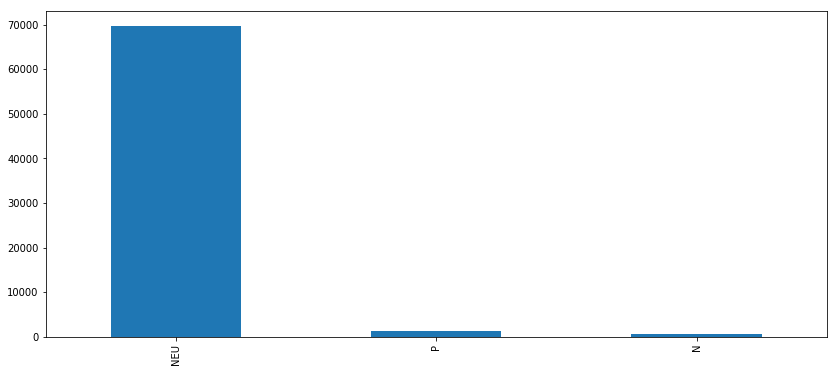

In [34]:
tweets['sentiment_blob'].value_counts().plot(figsize = (14,6),kind='bar')

# Nuevo Data Set con columna 'sentiment'

In [35]:
tweets.sentiment.value_counts()

N       49754
P       13544
NONE    7617 
NEU     528  
Name: sentiment, dtype: int64

In [36]:
sentiment = {'Positivo':'P','Negativo':'N','Neutro':'NEU', 'NaR':'NONE'}
for rating in sentiment:
    print("El porcentaje de tweets "+rating+"s","es: {}".format(round(len(tweets[tweets['sentiment']==sentiment[rating]])*100/len(tweets),1)))

El porcentaje de tweets Positivos es: 19.0
El porcentaje de tweets Negativos es: 69.6
El porcentaje de tweets Neutros es: 0.7
El porcentaje de tweets NaRs es: 10.7


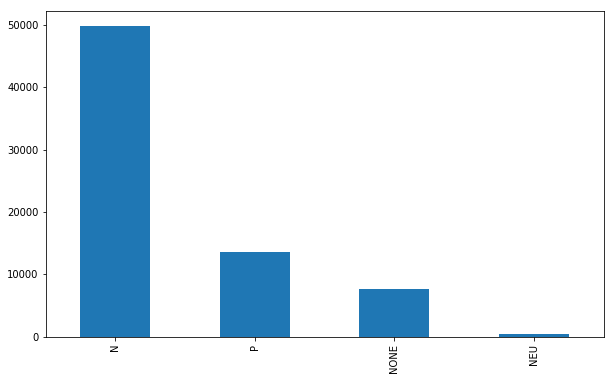

In [37]:
tweets.sentiment.value_counts().plot(figsize = (10,6),kind = 'bar')

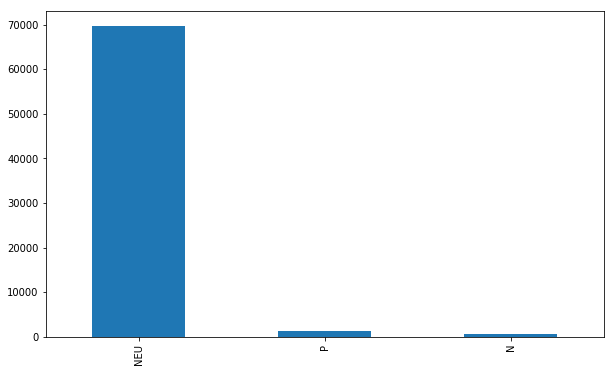

In [38]:
tweets['sentiment_blob'].value_counts().plot(figsize = (10,6),kind='bar')

In [39]:
import matplotlib.pyplot as plt
pie = tweets['sentiment'].value_counts()
labels = pie.index
sizes = pie[:]
explode = (0,0.1,0,0)

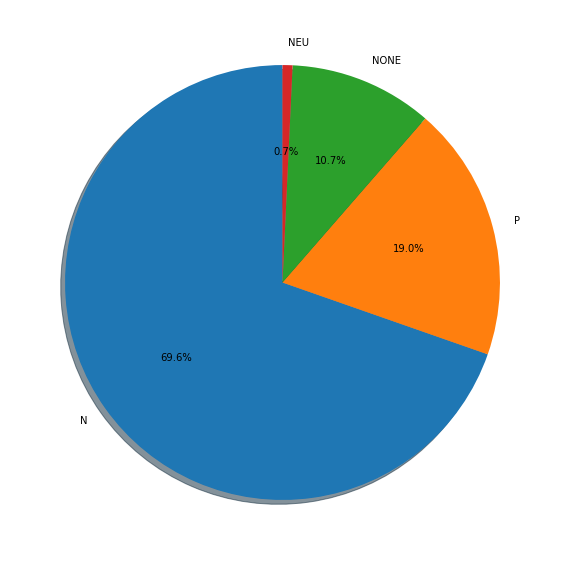

In [41]:
fig1, ax1=plt.subplots(figsize = (10,10));
ax1.pie(sizes, labels = labels,autopct='%1.1f%%', shadow = True,startangle=90);

# Analisis de los hashtags principales.

In [66]:
tweets.sample(5)

,id,created_at,text,favorited,retweeted,user_name,user_id,mentions,hts,original_id,full_text,favorite_count,retweet_count,sentiment,dia_hora,cleansed_text,sentiment_blob
20618,1101486634573459456,2019-03-01 14:17:32,Sres senadores ...pieque perniten que este psicopata llegue a un congreso vallado al mejor estilo del 76 ...no ¡¡¡¡sean complices.!!!!,False,False,victor,944487163,NaN,NaN,1101486634573459456,Sres senadores ...pieque perniten que este psicopata llegue a un congreso vallado al mejor estilo del 76 ...no ¡¡¡¡sean complices.!!!!,0,0,N,Mar-01 14:00,sres senadores pieque perniten que este psicopata llegue a un congreso vallado al mejor estilo del 76 no sean complices,NEU
78133,1101527649149702149,2019-03-01 17:00:31,RT @Yo89042186: Nos avisa Macri que con su gobierno bajo la pobreza. https://t.co/xHXw6YqyMR,False,False,argentinisimo,1033469284402520065,Yo89042186,NaN,1101507356045860870,Nos avisa Macri que con su gobierno bajo la pobreza. https://t.co/xHXw6YqyMR,18,10,N,Mar-01 17:00,nos avisa macri que con su gobierno bajo la pobreza,NEU
66893,1101511476907597828,2019-03-01 15:56:15,RT @StellaPassaro: @vikidonda Te vas a quedar con las ganas de que este sea el último discurso de #MM2019 abriendo #SesionesOrdinarias...!!!,False,False,Santiagotoday,1041818774352093184,StellaPassaro vikidonda,mm2019 sesionesordinarias,1101505355966791680,@vikidonda Te vas a quedar con las ganas de que este sea el último discurso de #MM2019 abriendo #SesionesOrdinarias...!!!,4,3,N,Mar-01 15:00,te vas a quedar con las ganas de que este sea el ultimo discurso de #mm2019 abriendo #sesionesordinarias,NEU
89203,1101548179357614081,2019-03-01 18:22:06,Jajajaja Argentina 🇦🇷,False,False,Esteban Bueseck,155293695,NaN,NaN,1101548179357614081,Jajajaja Argentina 🇦🇷,0,0,P,Mar-01 18:00,jajajaja argentina,NEU
214946,1102087956695863301,2019-03-03 06:06:59,RT @yotuel2000: Mis respetoss al pte Macri.por su perdida..y para los q hablan de lacalidad moral de su padre..EL Q.ESTE LIBRE DE PECADOS..…,False,False,YO Macrista #MM 2019-2023,96651497,yotuel2000,NaN,1102087701220769792,Mis respetoss al pte Macri.por su perdida..y para los q hablan de lacalidad moral de su padre..EL Q.ESTE LIBRE DE PECADOS..TIRE LA PRIMERA PIEDRA.AH..SABEN A CUANTA GENTE DIO TRABAJO ESTE HOMBRE?? +Q.E.P.D+,0,1,N,Mar-03 06:00,mis respetoss al pte macri por su perdida y para los q hablan de lacalidad moral de su padre el q este libre de pecados,NEU


In [61]:
# Convertimos en minusculas todas los hashtags, para no diferenciar entre #SesionesOrinarias y #sesionesordinarias. 
tweets['hts'] = tweets['hts'].str.lower()

In [62]:
for hts in tweets[~tweets.hts.isna()].hts.values:
    for ht in hts.split():
        ht_counts[ht] += 1

In [86]:
top10_hts = ht_counts.most_common(10)
top10_hts

[('sesionesordinarias', 9853),
 ('congreso', 3450),
 ('hayotrocamino', 2949),
 ('macrimiente', 1909),
 ('asamblealegislativa', 1192),
 ('macri', 838),
 ('aperturasesiones2019', 578),
 ('buenviernes', 457),
 ('macrienelcongreso', 455),
 ('macrilandia', 383)]

**Grafico de sentiment en hashtag #sesionesordinarias**

In [81]:
sesiones_ordinarias = (tweets['hts'].str.contains('sesionesordinarias')) & (~tweets.hts.isna())
pie = tweets[sesiones_ordinarias].sentiment.value_counts() 
labels = pie.index
sizes = pie[:]
explode = (0,0.1,0,0)

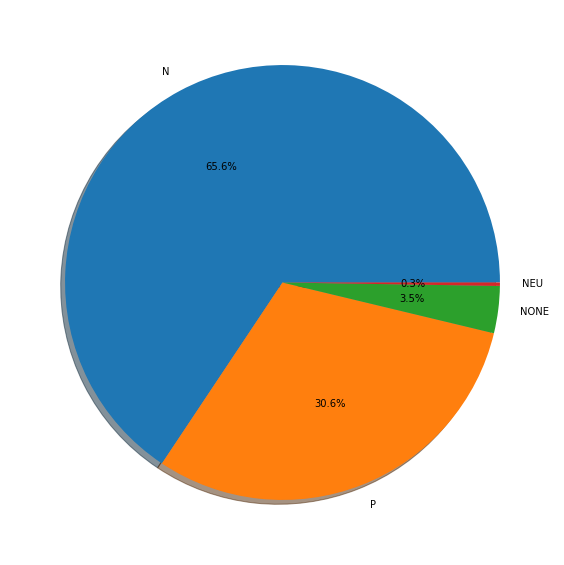

In [82]:
fig1, ax1=plt.subplots(figsize = (10,10));
ax1.pie(sizes, labels = labels,autopct='%1.1f%%', shadow = True,startangle=0);

**Grafico de sentiment en hashtag #hayotrocamino**

In [83]:
hay_otro_camino = (tweets['hts'].str.contains('hayotrocamino')) & (~tweets.hts.isna())
pie = tweets[hay_otro_camino].sentiment.value_counts() 
labels = pie.index
sizes = pie[:]
explode = (0,0.1,0,0)

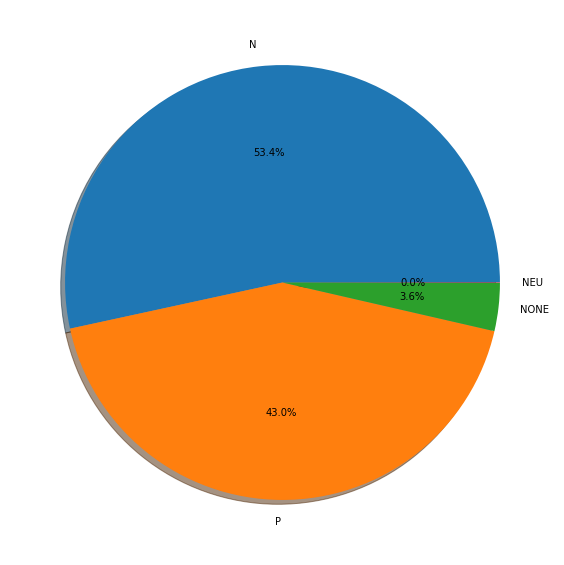

In [84]:
fig1, ax1=plt.subplots(figsize = (10,10));
ax1.pie(sizes, labels = labels,autopct='%1.1f%%', shadow = True,startangle=0);

**Grafico de sentiment en hashtag #macrimiente**

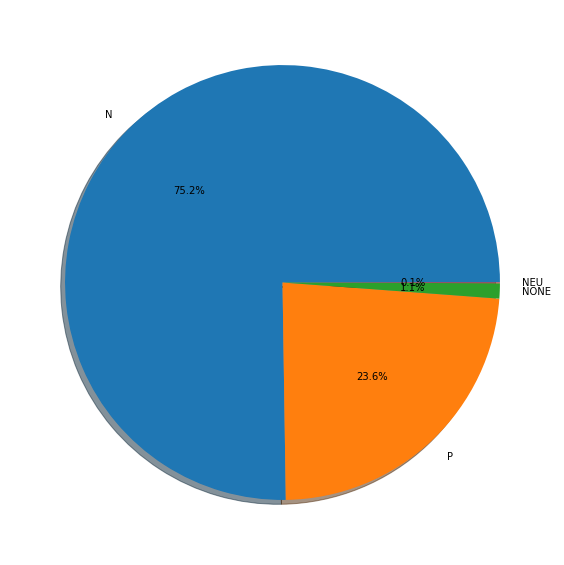

In [85]:
macri_miente = (tweets['hts'].str.contains('macrimiente')) & (~tweets.hts.isna())
pie = tweets[macri_miente].sentiment.value_counts() 
labels = pie.index
sizes = pie[:]
explode = (0,0.1,0,0)
fig1, ax1=plt.subplots(figsize = (10,10));
ax1.pie(sizes, labels = labels,autopct='%1.1f%%', shadow = True,startangle=0);

**Gráfico de sentiments en hashtag #macrienelcongreso**

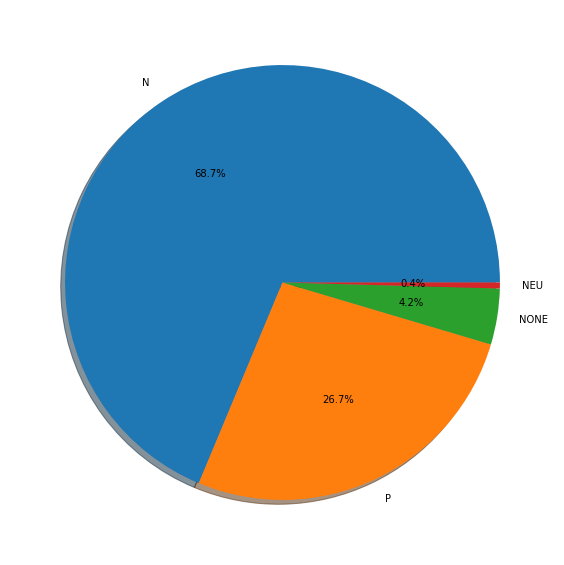

In [87]:
macrienelcongreso = (tweets['hts'].str.contains('macrienelcongreso')) & (~tweets.hts.isna())
pie = tweets[macrienelcongreso].sentiment.value_counts() 
labels = pie.index
sizes = pie[:]
explode = (0,0.1,0,0)
fig1, ax1=plt.subplots(figsize = (10,10));
ax1.pie(sizes, labels = labels,autopct='%1.1f%%', shadow = True,startangle=0);